In [60]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [61]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import holoviews as hv

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id"
)

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [63]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [119]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [65]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [66]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns, index=df_market_data.index)
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [67]:
# Copy the crypto names from the original data
crypto_names = df_market_data.index.to_series().copy()
crypto_names

coin_id
bitcoin                              bitcoin
ethereum                            ethereum
tether                                tether
ripple                                ripple
bitcoin-cash                    bitcoin-cash
binancecoin                      binancecoin
chainlink                          chainlink
cardano                              cardano
litecoin                            litecoin
bitcoin-cash-sv              bitcoin-cash-sv
crypto-com-chain            crypto-com-chain
usd-coin                            usd-coin
eos                                      eos
monero                                monero
tron                                    tron
tezos                                  tezos
okb                                      okb
stellar                              stellar
cosmos                                cosmos
cdai                                    cdai
neo                                      neo
wrapped-bitcoin              wrapped-bitcoin
le

---

### Find the Best Value for k Using the Original Data.

In [68]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [115]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

In [116]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}
elbow_data

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'inertia': [287.0,
  195.82021818036043,
  123.19048183836956,
  79.02243535120975,
  65.302379141625,
  52.88851821977532,
  43.91469044757746,
  37.51703249010357,
  32.485240832183536,
  28.22289929060893,
  24.545512769147678]}

In [117]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


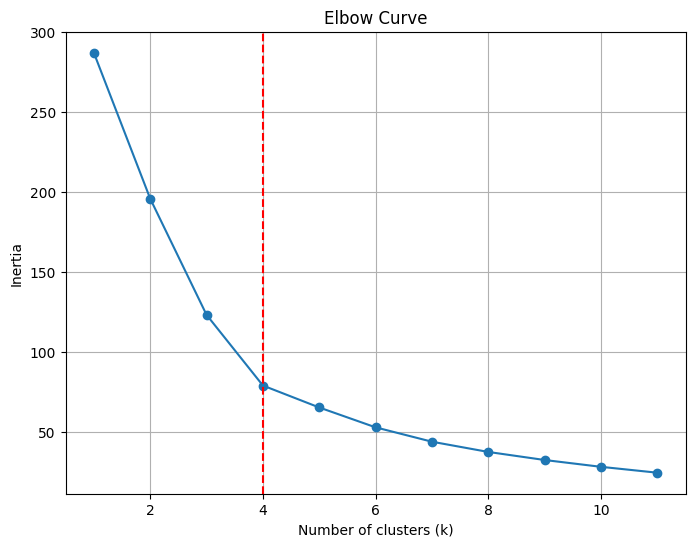

In [122]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.axvline(x=4, color='r', linestyle='--')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [123]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0, n_init=10)

In [124]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [125]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
clusters

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [126]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()
df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [127]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['Cluster'] = clusters

# Display sample data
df_market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [128]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_copy.reset_index(inplace=True)

df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols=["index"],
    color="Cluster",
    title="Cryptocurrency Clusters based on Price Change Percentages",
    xlabel="24 Hour Price Change Percentage",
    ylabel="7 Day Price Change Percentage",
    height=500,
    width=700
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,index)

---

### Optimize Clusters with Principal Component Analysis.

In [129]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [130]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
principal_components = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(
    data=principal_components, 
    columns=["PC 1", "PC 2", "PC 3"], 
    index=df_market_data.index
)
df_pca.head()

,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [131]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

Explained variance ratio: [0.3719856  0.34700813 0.17603793]


In [132]:
# Find the total explained variance of the three principal components
total_explained_variance = explained_variance_ratio.sum()
print(f"Total explained variance: {total_explained_variance}")

Total explained variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309842

In [133]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(
    data=principal_components, 
    columns=["PC 1", "PC 2", "PC 3"], 
    index=df_market_data.index
)

# Copy the crypto names from the original data
df_market_data_pca['Crypto_Name'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca.set_index('Crypto_Name', inplace=True)

# Display sample data
df_market_data_pca.head()

,PC 1,PC 2,PC 3
Crypto_Name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [134]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [135]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # 2. Fit the model to the data using `df_pca`
    kmeans.fit(df_market_data_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [136]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}
elbow_data

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'inertia': [256.8740855678923,
  165.90199402035998,
  93.77462568057287,
  49.66549665179734,
  37.87874703346245,
  27.61897178795741,
  21.182775862957303,
  17.38982320476889,
  13.593650379876726,
  10.559357562793426,
  8.007418066730581]}

In [137]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data)
elbow_pca_df.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [138]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.hvplot.line(
    x='k', 
    y='inertia', 
    xticks=k_values, 
    title='Elbow Curve', 
    xlabel='Number of clusters', 
    ylabel='Inertia'
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it is the same k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [139]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=1, n_init=10)

In [140]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_market_data_pca)

KMeans(n_clusters=4, n_init=10, random_state=1)

In [141]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.fit_predict(df_market_data_pca)

# Print the resulting array of cluster values.
clusters_pca

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [142]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_copy = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_copy['Cluster_PCA'] = clusters_pca

# Display sample data
df_market_data_pca_copy.head()

,PC 1,PC 2,PC 3,Cluster_PCA
Crypto_Name,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [143]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_pca_copy.reset_index(inplace=True)

df_market_data_pca_copy.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    hover_cols=["index"],
    color="Cluster_PCA",
    title="Cryptocurrency Clusters based on PCA Components",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    height=500,
    width=700
)

:Scatter   [PC 1]   (PC 2,Cluster_PCA,index)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [146]:
# Composite plot to contrast the Elbow curves
elbow_curves_original = elbow_df.hvplot.line(
    x='k',
    y='inertia',
    xticks=k_values, 
    title='Elbow Curve - Original Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia (Within-Cluster Sum of Squares)'
)


elbow_curves_pca = elbow_pca_df.hvplot.line(
    x='k', 
    y='inertia', 
    xticks=k_values, 
    title='Elbow Curve - PCA Data',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia (Within-Cluster Sum of Squares)'
)

elbow_curves_comparison = (elbow_curves_original + elbow_curves_pca).cols(1)
elbow_curves_comparison

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [147]:
# Composite plot to contrast the clusters


original_clusters = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hover_cols=["index"],
    color="Cluster",
    title="Cryptocurrency Clusters based on Price Change Percentages",
    xlabel="24 Hour Price Change Percentage",
    ylabel="7 Day Price Change Percentage",
    height=500,
    width=700
)

pca_clusters = df_market_data_pca_copy.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    hover_cols=["index"],
    color="Cluster_PCA",
    title="Cryptocurrency Clusters based on PCA Components",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    height=500,
    width=700
)

clusters_comparison = (original_clusters + pca_clusters).cols(1)
clusters_comparison

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,index)
   .Scatter.II :Scatter   [PC 1]   (PC 2,Cluster_PCA,index)

### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

### * **Answer:** 

Using fewer features to cluster the data using K-means, specifically through Principal Component Analysis (PCA), can have several impacts, both positive and negative. Let's discuss them:

### **Positive Impacts**

1. **Dimensionality Reduction**: PCA helps in reducing the dimensionality of the data, which can make K-means clustering computationally less expensive and faster.
   
2. **Noise Reduction**: By retaining only the most significant principal components, we can potentially reduce the noise in the data, leading to more robust clustering results.

3. **Better Visualization**: Reducing the data to two or three principal components allows for easy visualization of the clusters in 2D or 3D space, which is not possible in higher-dimensional spaces.

### **Negative Impacts**

1. **Loss of Information**: Using fewer features means that we are discarding some information, which can sometimes lead to less accurate clustering results if the discarded features contain important information.

2. **Interpretability**: The principal components created by PCA are linear combinations of the original features and may not have a clear interpretation, making it harder to understand the results of the clustering.

### **Specific Observations from Analysis**

- **Consistent Elbow Points**: From the elbow curves created using both the original and PCA data, we observed that the optimal number of clusters was similar (either 3 or 4), indicating that the main structure of the data was preserved in the PCA transformation.

- **Distinct Clusters**: The scatter plots of the clusters using both the original data and PCA data showed well-separated clusters, suggesting that the PCA transformation retained the essential characteristics of the data necessary for effective clustering.

### **Conclusion**

From the visual analysis of cluster results, it seems that using PCA to reduce the number of features before clustering with K-means was effective in this case. The PCA transformation retained the critical structures in the data necessary for clustering, leading to distinct and well-separated clusters, while also allowing for a reduction in the computational complexity of the clustering process.

It's important to note that the impact of using fewer features through PCA would depend on the specific dataset and problem at hand, and it's always a good practice to experiment with and without dimensionality reduction to understand its effects fully.